# Fall Detection YOLO-NAS Train & Predict


In [32]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


{'kaggle.json': b'{"username":"raymacraois","key":"528d5fa674f3ffd7d34aea206cabb346"}'}

In [33]:
# Install the kaggle library
!pip install kaggle

# Make .kaggle directory
!mkdir ~/.kaggle

# Copy the kaggle.json to this new directory
!cp kaggle.json ~/.kaggle/

# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Set the Kaggle username and key environment variables (optional, for some commands)
import os
os.environ['KAGGLE_USERNAME'] = "raymacraois"  # replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "528d5fa674f3ffd7d34aea206cabb346"  # replace with your Kaggle key


In [38]:
# !kaggle datasets download -d elwalyahmad/fall-detection

# Assuming the downloaded dataset is a zip file, unzip it into 'my_dataset_folder'
# !mkdir my_dataset_folder  # Create the folder where you want to extract the dataset
!unzip -q fall-detection.zip -d my_dataset_folder/  # Extract the dataset


https://github.com/Deci-AI/super-gradients<br/>

In [ ]:
# %%capture
# !pip install super-gradients
# !pip install --upgrade pillow
# !pip install --upgrade torchvision

In [ ]:
# import os
# import random
# import torch
# import requests
# from PIL import Image

# from super_gradients.training import Trainer, dataloaders, models
# from super_gradients.training.losses import PPYoloELoss
# from super_gradients.training.metrics import DetectionMetrics_050

# from super_gradients.training.dataloaders.dataloaders import (
#     coco_detection_yolo_format_train,
#     coco_detection_yolo_format_val
# )

# from super_gradients.training.models.detection_models.pp_yolo_e import (
#     PPYoloEPostPredictionCallback
# )

[2024-03-03 16:45:13] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-03-03 16:45:13] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-03-03 16:45:14] INFO - utils.py - NumExpr defaulting to 8 threads.
[2024-03-03 16:45:22] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-03-03 16:45:22] WARNING - export.py - Failed to import pytorch_quantization
[2024-03-03 16:45:22] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-03-03 16:45:22] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-03-03 16:45:22] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-03-03 16:45:22] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-03-03 16:45:22] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2024-03-03 16:45:22] WARNING - env_sanity_check.py - Failed to verify i

In [45]:
class config:
    #trainer params
    CHECKPOINT_DIR = 'checkpoints' #specify the path you want to save checkpoints to
    EXPERIMENT_NAME = 'fall_detection' #specify the experiment name
    #dataset params
    DATA_DIR = 'my_dataset_folder' #parent directory to where data lives
    TRAIN_IMAGES_DIR = 'train/images' #child dir of DATA_DIR where train images are
    TRAIN_LABELS_DIR = 'train/labels' #child dir of DATA_DIR where train labels are
    VAL_IMAGES_DIR = 'valid/images' #child dir of DATA_DIR where validation images are
    VAL_LABELS_DIR = 'valid/labels' #child dir of DATA_DIR where validation labels are
    # if you have a test set
    TEST_IMAGES_DIR = 'test/images' #child dir of DATA_DIR where test images are
    TEST_LABELS_DIR = 'test/labels' #child dir of DATA_DIR where test labels are

    CLASSES= ['Fall Detected', 'NoFall Detected']
 #what class names do you have

    NUM_CLASSES = len(CLASSES)

    #dataloader params - you can add whatever PyTorch dataloader params you have
    #could be different across train, val, and test
    DATALOADER_PARAMS={
    'batch_size':16,
    'num_workers':2
    }

    # model params
    MODEL_NAME = 'yolo_nas_l' # choose from yolo_nas_s, yolo_nas_m, yolo_nas_l
    PRETRAINED_WEIGHTS = 'coco' #only one option here: coco

In [46]:
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME,
                  ckpt_root_dir=config.CHECKPOINT_DIR)

In [47]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.VAL_IMAGES_DIR,
        'labels_dir': config.VAL_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TEST_IMAGES_DIR,
        'labels_dir': config.TEST_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

[2024-03-03 17:49:41] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 909/909 [00:00<00:00, 6568.25it/s]
[2024-03-03 17:49:42] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 101/101 [00:00<00:00, 6094.44it/s]
[2024-03-03 17:49:42] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 51/51 [00:00<00:00, 5430.69it/s]


# See train data

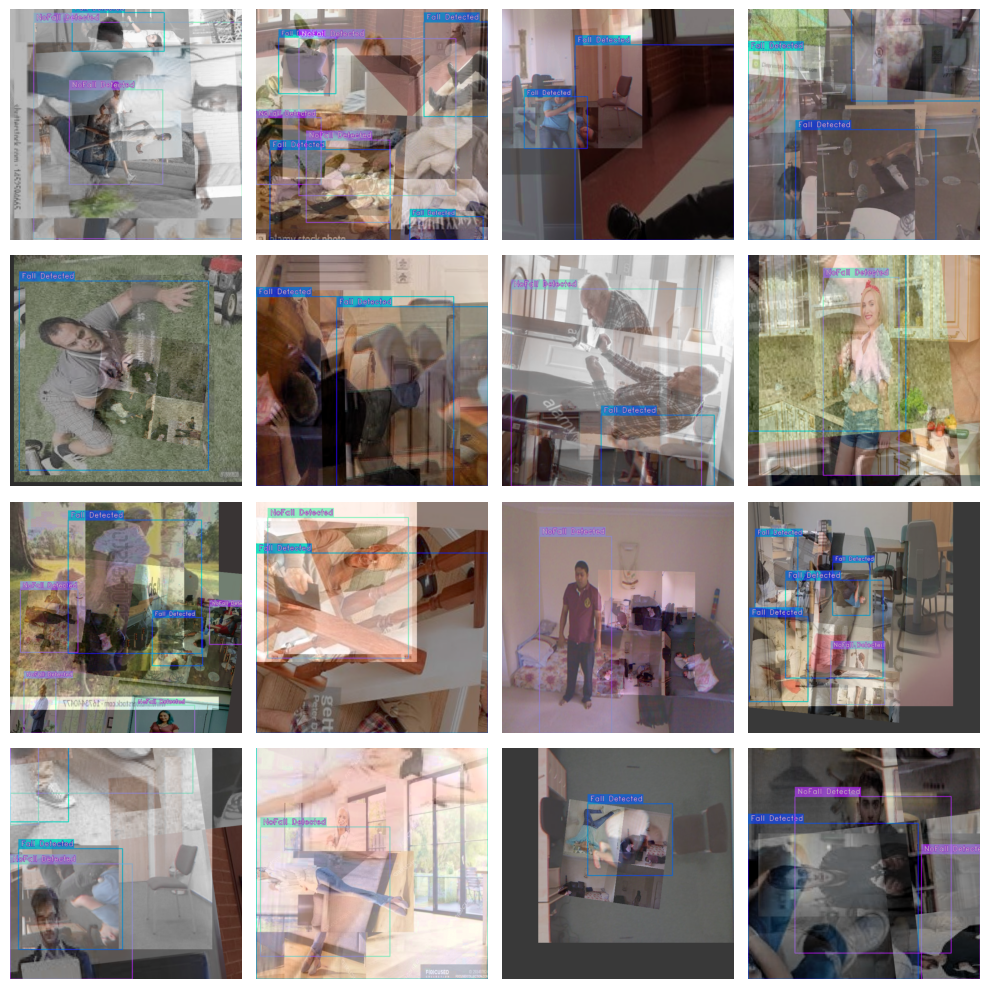

In [48]:
train_data.dataset.plot()

# Model

In [49]:
model = models.get(config.MODEL_NAME,
                   num_classes=config.NUM_CLASSES,
                   pretrained_weights=config.PRETRAINED_WEIGHTS
                   )

[2024-03-03 17:50:09] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:06<00:00, 43.0MB/s]
[2024-03-03 17:50:16] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [50]:
train_params = {
    # ENABLING SILENT MODE
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "AdamW",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 30,
    "mixed_precision": False, #mixed precision is not available for CPU
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=config.NUM_CLASSES,
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=config.NUM_CLASSES,
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

# Train the model

In [51]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-03-03 17:50:28] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240303_175028_946574`
[2024-03-03 17:50:28] INFO - sg_trainer.py - Checkpoints directory: checkpoints/fall_detection/RUN_20240303_175028_946574
[2024-03-03 17:50:28] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/optimizer_utils.py:108: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr v

The console stream is now moved to checkpoints/fall_detection/RUN_20240303_175028_946574/console_Mar03_17_50_28.txt


[2024-03-03 17:50:32] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            909        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         56         (len(train_loader))
    - Gradient updates per epoch:   56         (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_L  (66.91M parameters, 66.91M optimized)
    - Learning Rates and Weight Decays:
      - default: (66.91M parameters). LR: 0.0005 (66.91M parameters) WD: 0.0, (84.69K parameters), WD: 0.0001, (66.82M parameters)

[2024-03-03 17:50:32] INFO - sg_trainer.py - Started training for 3

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.1563
│   ├── Ppyoloeloss/loss_iou = 0.6704
│   ├── Ppyoloeloss/loss_dfl = 0.8583
│   └── Ppyoloeloss/loss = 3.685
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.2924
    ├── Ppyoloeloss/loss_iou = 0.5698
    ├── Ppyoloeloss/loss_dfl = 0.9163
    ├── Ppyoloeloss/loss = 3.7785
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0332
    ├── F1@0.50 = 0.0
    └── Best_score_threshold = 0.0



Validating epoch 1: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
[2024-03-03 17:52:01] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 17:52:01] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4406779110431671


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.387
│   │   ├── Epoch N-1      = 2.1563 (↘ -0.7693)
│   │   └── Best until now = 2.1563 (↘ -0.7693)
│   ├── Ppyoloeloss/loss_iou = 0.594
│   │   ├── Epoch N-1      = 0.6704 (↘ -0.0764)
│   │   └── Best until now = 0.6704 (↘ -0.0764)
│   ├── Ppyoloeloss/loss_dfl = 0.8312
│   │   ├── Epoch N-1      = 0.8583 (↘ -0.0271)
│   │   └── Best until now = 0.8583 (↘ -0.0271)
│   └── Ppyoloeloss/loss = 2.8122
│       ├── Epoch N-1      = 3.685  (↘ -0.8728)
│       └── Best until now = 3.685  (↘ -0.8728)
└── Validation
    ├── Ppyoloeloss/loss_cls = 7.1838
    │   ├── Epoch N-1      = 2.2924 (↗ 4.8914)
    │   └── Best until now = 2.2924 (↗ 4.8914)
    ├── Ppyoloeloss/loss_iou = 0.5649
    │   ├── Epoch N-1      = 0.5698 (↘ -0.0049)
    │   └── Best until now = 0.5698 (↘ -0.0049)
    ├── Ppyoloeloss/loss_dfl = 0.9059
    │   ├── Epoch N-1      = 0.9163 (↘ -0.0104)
    │   └── Best until now = 0.9163 (↘ -0.0104)
    ├── Ppyoloeloss/loss =

Validating epoch 2: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2405
│   │   ├── Epoch N-1      = 1.387  (↘ -0.1465)
│   │   └── Best until now = 1.387  (↘ -0.1465)
│   ├── Ppyoloeloss/loss_iou = 0.5741
│   │   ├── Epoch N-1      = 0.594  (↘ -0.02)
│   │   └── Best until now = 0.594  (↘ -0.02)
│   ├── Ppyoloeloss/loss_dfl = 0.7914
│   │   ├── Epoch N-1      = 0.8312 (↘ -0.0398)
│   │   └── Best until now = 0.8312 (↘ -0.0398)
│   └── Ppyoloeloss/loss = 2.606
│       ├── Epoch N-1      = 2.8122 (↘ -0.2062)
│       └── Best until now = 2.8122 (↘ -0.2062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.0991
    │   ├── Epoch N-1      = 7.1838 (↘ -5.0847)
    │   └── Best until now = 2.2924 (↘ -0.1933)
    ├── Ppyoloeloss/loss_iou = 0.6424
    │   ├── Epoch N-1      = 0.5649 (↗ 0.0775)
    │   └── Best until now = 0.5649 (↗ 0.0775)
    ├── Ppyoloeloss/loss_dfl = 1.0072
    │   ├── Epoch N-1      = 0.9059 (↗ 0.1013)
    │   └── Best until now = 0.9059 (↗ 0.1013)
    ├── Ppyoloeloss/loss = 3.74

Validating epoch 3: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2288
│   │   ├── Epoch N-1      = 1.2405 (↘ -0.0117)
│   │   └── Best until now = 1.2405 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_iou = 0.5905
│   │   ├── Epoch N-1      = 0.5741 (↗ 0.0165)
│   │   └── Best until now = 0.5741 (↗ 0.0165)
│   ├── Ppyoloeloss/loss_dfl = 0.8082
│   │   ├── Epoch N-1      = 0.7914 (↗ 0.0168)
│   │   └── Best until now = 0.7914 (↗ 0.0168)
│   └── Ppyoloeloss/loss = 2.6275
│       ├── Epoch N-1      = 2.606  (↗ 0.0215)
│       └── Best until now = 2.606  (↗ 0.0215)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.6494
    │   ├── Epoch N-1      = 2.0991 (↘ -0.4497)
    │   └── Best until now = 2.0991 (↘ -0.4497)
    ├── Ppyoloeloss/loss_iou = 0.6191
    │   ├── Epoch N-1      = 0.6424 (↘ -0.0232)
    │   └── Best until now = 0.5649 (↗ 0.0543)
    ├── Ppyoloeloss/loss_dfl = 0.994
    │   ├── Epoch N-1      = 1.0072 (↘ -0.0131)
    │   └── Best until now = 0.9059 (↗ 0.0882)
    ├── Ppyoloeloss/loss = 3.26

Validating epoch 4: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2161
│   │   ├── Epoch N-1      = 1.2288 (↘ -0.0127)
│   │   └── Best until now = 1.2288 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.5519
│   │   ├── Epoch N-1      = 0.5905 (↘ -0.0387)
│   │   └── Best until now = 0.5741 (↘ -0.0222)
│   ├── Ppyoloeloss/loss_dfl = 0.7729
│   │   ├── Epoch N-1      = 0.8082 (↘ -0.0353)
│   │   └── Best until now = 0.7914 (↘ -0.0185)
│   └── Ppyoloeloss/loss = 2.5409
│       ├── Epoch N-1      = 2.6275 (↘ -0.0866)
│       └── Best until now = 2.606  (↘ -0.0651)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3533
    │   ├── Epoch N-1      = 1.6494 (↘ -0.2961)
    │   └── Best until now = 1.6494 (↘ -0.2961)
    ├── Ppyoloeloss/loss_iou = 0.5592
    │   ├── Epoch N-1      = 0.6191 (↘ -0.0599)
    │   └── Best until now = 0.5649 (↘ -0.0057)
    ├── Ppyoloeloss/loss_dfl = 0.8757
    │   ├── Epoch N-1      = 0.994  (↘ -0.1183)
    │   └── Best until now = 0.9059 (↘ -0.0301)
    ├── Ppyoloeloss/lo

Validating epoch 5: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2023
│   │   ├── Epoch N-1      = 1.2161 (↘ -0.0138)
│   │   └── Best until now = 1.2161 (↘ -0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.5332
│   │   ├── Epoch N-1      = 0.5519 (↘ -0.0187)
│   │   └── Best until now = 0.5519 (↘ -0.0187)
│   ├── Ppyoloeloss/loss_dfl = 0.76
│   │   ├── Epoch N-1      = 0.7729 (↘ -0.0129)
│   │   └── Best until now = 0.7729 (↘ -0.0129)
│   └── Ppyoloeloss/loss = 2.4955
│       ├── Epoch N-1      = 2.5409 (↘ -0.0454)
│       └── Best until now = 2.5409 (↘ -0.0454)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5716
    │   ├── Epoch N-1      = 1.3533 (↗ 0.2183)
    │   └── Best until now = 1.3533 (↗ 0.2183)
    ├── Ppyoloeloss/loss_iou = 0.5923
    │   ├── Epoch N-1      = 0.5592 (↗ 0.0331)
    │   └── Best until now = 0.5592 (↗ 0.0331)
    ├── Ppyoloeloss/loss_dfl = 0.9262
    │   ├── Epoch N-1      = 0.8757 (↗ 0.0505)
    │   └── Best until now = 0.8757 (↗ 0.0505)
    ├── Ppyoloeloss/loss = 3.0

Validating epoch 6: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]
[2024-03-03 17:55:47] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 17:55:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.573340892791748


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1725
│   │   ├── Epoch N-1      = 1.2023 (↘ -0.0298)
│   │   └── Best until now = 1.2023 (↘ -0.0298)
│   ├── Ppyoloeloss/loss_iou = 0.5127
│   │   ├── Epoch N-1      = 0.5332 (↘ -0.0205)
│   │   └── Best until now = 0.5332 (↘ -0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.7378
│   │   ├── Epoch N-1      = 0.76   (↘ -0.0223)
│   │   └── Best until now = 0.76   (↘ -0.0223)
│   └── Ppyoloeloss/loss = 2.423
│       ├── Epoch N-1      = 2.4955 (↘ -0.0725)
│       └── Best until now = 2.4955 (↘ -0.0725)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3974
    │   ├── Epoch N-1      = 1.5716 (↘ -0.1741)
    │   └── Best until now = 1.3533 (↗ 0.0442)
    ├── Ppyoloeloss/loss_iou = 0.5273
    │   ├── Epoch N-1      = 0.5923 (↘ -0.065)
    │   └── Best until now = 0.5592 (↘ -0.0319)
    ├── Ppyoloeloss/loss_dfl = 0.8289
    │   ├── Epoch N-1      = 0.9262 (↘ -0.0974)
    │   └── Best until now = 0.8757 (↘ -0.0469)
    ├── Ppyoloeloss/loss 

Validating epoch 7: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1662
│   │   ├── Epoch N-1      = 1.1725 (↘ -0.0063)
│   │   └── Best until now = 1.1725 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.5054
│   │   ├── Epoch N-1      = 0.5127 (↘ -0.0074)
│   │   └── Best until now = 0.5127 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.7278
│   │   ├── Epoch N-1      = 0.7378 (↘ -0.0099)
│   │   └── Best until now = 0.7378 (↘ -0.0099)
│   └── Ppyoloeloss/loss = 2.3994
│       ├── Epoch N-1      = 2.423  (↘ -0.0236)
│       └── Best until now = 2.423  (↘ -0.0236)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.194
    │   ├── Epoch N-1      = 1.3974 (↘ -0.2035)
    │   └── Best until now = 1.3533 (↘ -0.1593)
    ├── Ppyoloeloss/loss_iou = 0.4984
    │   ├── Epoch N-1      = 0.5273 (↘ -0.0288)
    │   └── Best until now = 0.5273 (↘ -0.0288)
    ├── Ppyoloeloss/loss_dfl = 0.7986
    │   ├── Epoch N-1      = 0.8289 (↘ -0.0303)
    │   └── Best until now = 0.8289 (↘ -0.0303)
    ├── Ppyoloeloss/los

Validating epoch 8: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.143
│   │   ├── Epoch N-1      = 1.1662 (↘ -0.0231)
│   │   └── Best until now = 1.1662 (↘ -0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.4855
│   │   ├── Epoch N-1      = 0.5054 (↘ -0.0199)
│   │   └── Best until now = 0.5054 (↘ -0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.7064
│   │   ├── Epoch N-1      = 0.7278 (↘ -0.0214)
│   │   └── Best until now = 0.7278 (↘ -0.0214)
│   └── Ppyoloeloss/loss = 2.335
│       ├── Epoch N-1      = 2.3994 (↘ -0.0644)
│       └── Best until now = 2.3994 (↘ -0.0644)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4241
    │   ├── Epoch N-1      = 1.194  (↗ 0.2302)
    │   └── Best until now = 1.194  (↗ 0.2302)
    ├── Ppyoloeloss/loss_iou = 0.533
    │   ├── Epoch N-1      = 0.4984 (↗ 0.0346)
    │   └── Best until now = 0.4984 (↗ 0.0346)
    ├── Ppyoloeloss/loss_dfl = 0.8809
    │   ├── Epoch N-1      = 0.7986 (↗ 0.0824)
    │   └── Best until now = 0.7986 (↗ 0.0824)
    ├── Ppyoloeloss/loss = 2.83

Validating epoch 9: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.123
│   │   ├── Epoch N-1      = 1.143  (↘ -0.02)
│   │   └── Best until now = 1.143  (↘ -0.02)
│   ├── Ppyoloeloss/loss_iou = 0.4855
│   │   ├── Epoch N-1      = 0.4855 (↗ 0.0)
│   │   └── Best until now = 0.4855 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.7013
│   │   ├── Epoch N-1      = 0.7064 (↘ -0.0051)
│   │   └── Best until now = 0.7064 (↘ -0.0051)
│   └── Ppyoloeloss/loss = 2.3098
│       ├── Epoch N-1      = 2.335  (↘ -0.0252)
│       └── Best until now = 2.335  (↘ -0.0252)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3107
    │   ├── Epoch N-1      = 1.4241 (↘ -0.1135)
    │   └── Best until now = 1.194  (↗ 0.1167)
    ├── Ppyoloeloss/loss_iou = 0.5684
    │   ├── Epoch N-1      = 0.533  (↗ 0.0354)
    │   └── Best until now = 0.4984 (↗ 0.07)
    ├── Ppyoloeloss/loss_dfl = 0.9123
    │   ├── Epoch N-1      = 0.8809 (↗ 0.0314)
    │   └── Best until now = 0.7986 (↗ 0.1137)
    ├── Ppyoloeloss/loss = 2.7913
    │   

Validating epoch 10: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
[2024-03-03 17:59:06] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 17:59:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5779035091400146


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0998
│   │   ├── Epoch N-1      = 1.123  (↘ -0.0232)
│   │   └── Best until now = 1.123  (↘ -0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.4728
│   │   ├── Epoch N-1      = 0.4855 (↘ -0.0127)
│   │   └── Best until now = 0.4855 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.6884
│   │   ├── Epoch N-1      = 0.7013 (↘ -0.0128)
│   │   └── Best until now = 0.7013 (↘ -0.0128)
│   └── Ppyoloeloss/loss = 2.2611
│       ├── Epoch N-1      = 2.3098 (↘ -0.0487)
│       └── Best until now = 2.3098 (↘ -0.0487)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2282
    │   ├── Epoch N-1      = 1.3107 (↘ -0.0825)
    │   └── Best until now = 1.194  (↗ 0.0342)
    ├── Ppyoloeloss/loss_iou = 0.5189
    │   ├── Epoch N-1      = 0.5684 (↘ -0.0495)
    │   └── Best until now = 0.4984 (↗ 0.0205)
    ├── Ppyoloeloss/loss_dfl = 0.8218
    │   ├── Epoch N-1      = 0.9123 (↘ -0.0905)
    │   └── Best until now = 0.7986 (↗ 0.0232)
    ├── Ppyoloeloss/loss

Validating epoch 11: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0931
│   │   ├── Epoch N-1      = 1.0998 (↘ -0.0067)
│   │   └── Best until now = 1.0998 (↘ -0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.462
│   │   ├── Epoch N-1      = 0.4728 (↘ -0.0108)
│   │   └── Best until now = 0.4728 (↘ -0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.6823
│   │   ├── Epoch N-1      = 0.6884 (↘ -0.0061)
│   │   └── Best until now = 0.6884 (↘ -0.0061)
│   └── Ppyoloeloss/loss = 2.2374
│       ├── Epoch N-1      = 2.2611 (↘ -0.0236)
│       └── Best until now = 2.2611 (↘ -0.0236)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2299
    │   ├── Epoch N-1      = 1.2282 (↗ 0.0017)
    │   └── Best until now = 1.194  (↗ 0.0359)
    ├── Ppyoloeloss/loss_iou = 0.5417
    │   ├── Epoch N-1      = 0.5189 (↗ 0.0228)
    │   └── Best until now = 0.4984 (↗ 0.0433)
    ├── Ppyoloeloss/loss_dfl = 0.8571
    │   ├── Epoch N-1      = 0.8218 (↗ 0.0353)
    │   └── Best until now = 0.7986 (↗ 0.0585)
    ├── Ppyoloeloss/loss = 2

Validating epoch 12: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0737
│   │   ├── Epoch N-1      = 1.0931 (↘ -0.0193)
│   │   └── Best until now = 1.0931 (↘ -0.0193)
│   ├── Ppyoloeloss/loss_iou = 0.4477
│   │   ├── Epoch N-1      = 0.462  (↘ -0.0143)
│   │   └── Best until now = 0.462  (↘ -0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.6672
│   │   ├── Epoch N-1      = 0.6823 (↘ -0.0151)
│   │   └── Best until now = 0.6823 (↘ -0.0151)
│   └── Ppyoloeloss/loss = 2.1887
│       ├── Epoch N-1      = 2.2374 (↘ -0.0488)
│       └── Best until now = 2.2374 (↘ -0.0488)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4793
    │   ├── Epoch N-1      = 1.2299 (↗ 0.2494)
    │   └── Best until now = 1.194  (↗ 0.2854)
    ├── Ppyoloeloss/loss_iou = 0.5641
    │   ├── Epoch N-1      = 0.5417 (↗ 0.0224)
    │   └── Best until now = 0.4984 (↗ 0.0657)
    ├── Ppyoloeloss/loss_dfl = 0.9068
    │   ├── Epoch N-1      = 0.8571 (↗ 0.0497)
    │   └── Best until now = 0.7986 (↗ 0.1082)
    ├── Ppyoloeloss/loss = 

Validating epoch 13: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
[2024-03-03 18:01:45] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 18:01:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6250231862068176


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0699
│   │   ├── Epoch N-1      = 1.0737 (↘ -0.0038)
│   │   └── Best until now = 1.0737 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.4453
│   │   ├── Epoch N-1      = 0.4477 (↘ -0.0025)
│   │   └── Best until now = 0.4477 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.6595
│   │   ├── Epoch N-1      = 0.6672 (↘ -0.0077)
│   │   └── Best until now = 0.6672 (↘ -0.0077)
│   └── Ppyoloeloss/loss = 2.1747
│       ├── Epoch N-1      = 2.1887 (↘ -0.014)
│       └── Best until now = 2.1887 (↘ -0.014)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1608
    │   ├── Epoch N-1      = 1.4793 (↘ -0.3185)
    │   └── Best until now = 1.194  (↘ -0.0332)
    ├── Ppyoloeloss/loss_iou = 0.5099
    │   ├── Epoch N-1      = 0.5641 (↘ -0.0542)
    │   └── Best until now = 0.4984 (↗ 0.0115)
    ├── Ppyoloeloss/loss_dfl = 0.8101
    │   ├── Epoch N-1      = 0.9068 (↘ -0.0967)
    │   └── Best until now = 0.7986 (↗ 0.0115)
    ├── Ppyoloeloss/loss 

Validating epoch 14: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0636
│   │   ├── Epoch N-1      = 1.0699 (↘ -0.0063)
│   │   └── Best until now = 1.0699 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.4374
│   │   ├── Epoch N-1      = 0.4453 (↘ -0.0078)
│   │   └── Best until now = 0.4453 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.6541
│   │   ├── Epoch N-1      = 0.6595 (↘ -0.0054)
│   │   └── Best until now = 0.6595 (↘ -0.0054)
│   └── Ppyoloeloss/loss = 2.1551
│       ├── Epoch N-1      = 2.1747 (↘ -0.0196)
│       └── Best until now = 2.1747 (↘ -0.0196)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3049
    │   ├── Epoch N-1      = 1.1608 (↗ 0.1441)
    │   └── Best until now = 1.1608 (↗ 0.1441)
    ├── Ppyoloeloss/loss_iou = 0.5091
    │   ├── Epoch N-1      = 0.5099 (↘ -0.0008)
    │   └── Best until now = 0.4984 (↗ 0.0107)
    ├── Ppyoloeloss/loss_dfl = 0.8453
    │   ├── Epoch N-1      = 0.8101 (↗ 0.0352)
    │   └── Best until now = 0.7986 (↗ 0.0467)
    ├── Ppyoloeloss/loss =

Validating epoch 15: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
[2024-03-03 18:03:31] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 18:03:31] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7266373634338379


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0225
│   │   ├── Epoch N-1      = 1.0636 (↘ -0.0411)
│   │   └── Best until now = 1.0636 (↘ -0.0411)
│   ├── Ppyoloeloss/loss_iou = 0.4281
│   │   ├── Epoch N-1      = 0.4374 (↘ -0.0093)
│   │   └── Best until now = 0.4374 (↘ -0.0093)
│   ├── Ppyoloeloss/loss_dfl = 0.6421
│   │   ├── Epoch N-1      = 0.6541 (↘ -0.012)
│   │   └── Best until now = 0.6541 (↘ -0.012)
│   └── Ppyoloeloss/loss = 2.0926
│       ├── Epoch N-1      = 2.1551 (↘ -0.0625)
│       └── Best until now = 2.1551 (↘ -0.0625)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1444
    │   ├── Epoch N-1      = 1.3049 (↘ -0.1605)
    │   └── Best until now = 1.1608 (↘ -0.0164)
    ├── Ppyoloeloss/loss_iou = 0.4835
    │   ├── Epoch N-1      = 0.5091 (↘ -0.0256)
    │   └── Best until now = 0.4984 (↘ -0.015)
    ├── Ppyoloeloss/loss_dfl = 0.8154
    │   ├── Epoch N-1      = 0.8453 (↘ -0.0299)
    │   └── Best until now = 0.7986 (↗ 0.0168)
    ├── Ppyoloeloss/loss 

Validating epoch 16: 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.025
│   │   ├── Epoch N-1      = 1.0225 (↗ 0.0025)
│   │   └── Best until now = 1.0225 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.4254
│   │   ├── Epoch N-1      = 0.4281 (↘ -0.0027)
│   │   └── Best until now = 0.4281 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6445
│   │   ├── Epoch N-1      = 0.6421 (↗ 0.0025)
│   │   └── Best until now = 0.6421 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 2.0949
│       ├── Epoch N-1      = 2.0926 (↗ 0.0023)
│       └── Best until now = 2.0926 (↗ 0.0023)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1546
    │   ├── Epoch N-1      = 1.1444 (↗ 0.0102)
    │   └── Best until now = 1.1444 (↗ 0.0102)
    ├── Ppyoloeloss/loss_iou = 0.5027
    │   ├── Epoch N-1      = 0.4835 (↗ 0.0192)
    │   └── Best until now = 0.4835 (↗ 0.0192)
    ├── Ppyoloeloss/loss_dfl = 0.8115
    │   ├── Epoch N-1      = 0.8154 (↘ -0.0039)
    │   └── Best until now = 0.7986 (↗ 0.0129)
    ├── Ppyoloeloss/loss = 2.4688

Validating epoch 17: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0058
│   │   ├── Epoch N-1      = 1.025  (↘ -0.0191)
│   │   └── Best until now = 1.0225 (↘ -0.0166)
│   ├── Ppyoloeloss/loss_iou = 0.4241
│   │   ├── Epoch N-1      = 0.4254 (↘ -0.0013)
│   │   └── Best until now = 0.4254 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.6423
│   │   ├── Epoch N-1      = 0.6445 (↘ -0.0023)
│   │   └── Best until now = 0.6421 (↗ 0.0002)
│   └── Ppyoloeloss/loss = 2.0721
│       ├── Epoch N-1      = 2.0949 (↘ -0.0228)
│       └── Best until now = 2.0926 (↘ -0.0205)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1475
    │   ├── Epoch N-1      = 1.1546 (↘ -0.0071)
    │   └── Best until now = 1.1444 (↗ 0.0031)
    ├── Ppyoloeloss/loss_iou = 0.4951
    │   ├── Epoch N-1      = 0.5027 (↘ -0.0075)
    │   └── Best until now = 0.4835 (↗ 0.0117)
    ├── Ppyoloeloss/loss_dfl = 0.8227
    │   ├── Epoch N-1      = 0.8115 (↗ 0.0111)
    │   └── Best until now = 0.7986 (↗ 0.0241)
    ├── Ppyoloeloss/loss =

Validating epoch 18: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9979
│   │   ├── Epoch N-1      = 1.0058 (↘ -0.008)
│   │   └── Best until now = 1.0058 (↘ -0.008)
│   ├── Ppyoloeloss/loss_iou = 0.4145
│   │   ├── Epoch N-1      = 0.4241 (↘ -0.0096)
│   │   └── Best until now = 0.4241 (↘ -0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.6294
│   │   ├── Epoch N-1      = 0.6423 (↘ -0.0129)
│   │   └── Best until now = 0.6421 (↘ -0.0127)
│   └── Ppyoloeloss/loss = 2.0418
│       ├── Epoch N-1      = 2.0721 (↘ -0.0304)
│       └── Best until now = 2.0721 (↘ -0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0939
    │   ├── Epoch N-1      = 1.1475 (↘ -0.0536)
    │   └── Best until now = 1.1444 (↘ -0.0505)
    ├── Ppyoloeloss/loss_iou = 0.493
    │   ├── Epoch N-1      = 0.4951 (↘ -0.0022)
    │   └── Best until now = 0.4835 (↗ 0.0095)
    ├── Ppyoloeloss/loss_dfl = 0.7795
    │   ├── Epoch N-1      = 0.8227 (↘ -0.0431)
    │   └── Best until now = 0.7986 (↘ -0.019)
    ├── Ppyoloeloss/loss =

Validating epoch 19: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9733
│   │   ├── Epoch N-1      = 0.9979 (↘ -0.0245)
│   │   └── Best until now = 0.9979 (↘ -0.0245)
│   ├── Ppyoloeloss/loss_iou = 0.4002
│   │   ├── Epoch N-1      = 0.4145 (↘ -0.0143)
│   │   └── Best until now = 0.4145 (↘ -0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.6175
│   │   ├── Epoch N-1      = 0.6294 (↘ -0.0119)
│   │   └── Best until now = 0.6294 (↘ -0.0119)
│   └── Ppyoloeloss/loss = 1.991
│       ├── Epoch N-1      = 2.0418 (↘ -0.0508)
│       └── Best until now = 2.0418 (↘ -0.0508)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1159
    │   ├── Epoch N-1      = 1.0939 (↗ 0.022)
    │   └── Best until now = 1.0939 (↗ 0.022)
    ├── Ppyoloeloss/loss_iou = 0.5007
    │   ├── Epoch N-1      = 0.493  (↗ 0.0078)
    │   └── Best until now = 0.4835 (↗ 0.0173)
    ├── Ppyoloeloss/loss_dfl = 0.81
    │   ├── Epoch N-1      = 0.7795 (↗ 0.0304)
    │   └── Best until now = 0.7795 (↗ 0.0304)
    ├── Ppyoloeloss/loss = 2.426

Validating epoch 20: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9635
│   │   ├── Epoch N-1      = 0.9733 (↘ -0.0099)
│   │   └── Best until now = 0.9733 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_iou = 0.3995
│   │   ├── Epoch N-1      = 0.4002 (↘ -0.0007)
│   │   └── Best until now = 0.4002 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.611
│   │   ├── Epoch N-1      = 0.6175 (↘ -0.0065)
│   │   └── Best until now = 0.6175 (↘ -0.0065)
│   └── Ppyoloeloss/loss = 1.9739
│       ├── Epoch N-1      = 1.991  (↘ -0.017)
│       └── Best until now = 1.991  (↘ -0.017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2494
    │   ├── Epoch N-1      = 1.1159 (↗ 0.1335)
    │   └── Best until now = 1.0939 (↗ 0.1555)
    ├── Ppyoloeloss/loss_iou = 0.5002
    │   ├── Epoch N-1      = 0.5007 (↘ -0.0005)
    │   └── Best until now = 0.4835 (↗ 0.0168)
    ├── Ppyoloeloss/loss_dfl = 0.8109
    │   ├── Epoch N-1      = 0.81   (↗ 0.0009)
    │   └── Best until now = 0.7795 (↗ 0.0314)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 21: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9571
│   │   ├── Epoch N-1      = 0.9635 (↘ -0.0064)
│   │   └── Best until now = 0.9635 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.3832
│   │   ├── Epoch N-1      = 0.3995 (↘ -0.0164)
│   │   └── Best until now = 0.3995 (↘ -0.0164)
│   ├── Ppyoloeloss/loss_dfl = 0.5931
│   │   ├── Epoch N-1      = 0.611  (↘ -0.0179)
│   │   └── Best until now = 0.611  (↘ -0.0179)
│   └── Ppyoloeloss/loss = 1.9333
│       ├── Epoch N-1      = 1.9739 (↘ -0.0406)
│       └── Best until now = 1.9739 (↘ -0.0406)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0752
    │   ├── Epoch N-1      = 1.2494 (↘ -0.1742)
    │   └── Best until now = 1.0939 (↘ -0.0187)
    ├── Ppyoloeloss/loss_iou = 0.4759
    │   ├── Epoch N-1      = 0.5002 (↘ -0.0243)
    │   └── Best until now = 0.4835 (↘ -0.0075)
    ├── Ppyoloeloss/loss_dfl = 0.7612
    │   ├── Epoch N-1      = 0.8109 (↘ -0.0497)
    │   └── Best until now = 0.7795 (↘ -0.0183)
    ├── Ppyoloeloss/l

Validating epoch 22: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]
[2024-03-03 18:09:55] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 18:09:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7333886623382568


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9473
│   │   ├── Epoch N-1      = 0.9571 (↘ -0.0098)
│   │   └── Best until now = 0.9571 (↘ -0.0098)
│   ├── Ppyoloeloss/loss_iou = 0.3949
│   │   ├── Epoch N-1      = 0.3832 (↗ 0.0117)
│   │   └── Best until now = 0.3832 (↗ 0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.6094
│   │   ├── Epoch N-1      = 0.5931 (↗ 0.0163)
│   │   └── Best until now = 0.5931 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.9515
│       ├── Epoch N-1      = 1.9333 (↗ 0.0182)
│       └── Best until now = 1.9333 (↗ 0.0182)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0782
    │   ├── Epoch N-1      = 1.0752 (↗ 0.003)
    │   └── Best until now = 1.0752 (↗ 0.003)
    ├── Ppyoloeloss/loss_iou = 0.4804
    │   ├── Epoch N-1      = 0.4759 (↗ 0.0045)
    │   └── Best until now = 0.4759 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.758
    │   ├── Epoch N-1      = 0.7612 (↘ -0.0032)
    │   └── Best until now = 0.7612 (↘ -0.0032)
    ├── Ppyoloeloss/loss = 2.3166


Validating epoch 23: 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9259
│   │   ├── Epoch N-1      = 0.9473 (↘ -0.0214)
│   │   └── Best until now = 0.9473 (↘ -0.0214)
│   ├── Ppyoloeloss/loss_iou = 0.3772
│   │   ├── Epoch N-1      = 0.3949 (↘ -0.0176)
│   │   └── Best until now = 0.3832 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.5905
│   │   ├── Epoch N-1      = 0.6094 (↘ -0.0188)
│   │   └── Best until now = 0.5931 (↘ -0.0025)
│   └── Ppyoloeloss/loss = 1.8937
│       ├── Epoch N-1      = 1.9515 (↘ -0.0578)
│       └── Best until now = 1.9333 (↘ -0.0396)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1617
    │   ├── Epoch N-1      = 1.0782 (↗ 0.0834)
    │   └── Best until now = 1.0752 (↗ 0.0865)
    ├── Ppyoloeloss/loss_iou = 0.4779
    │   ├── Epoch N-1      = 0.4804 (↘ -0.0025)
    │   └── Best until now = 0.4759 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.7804
    │   ├── Epoch N-1      = 0.758  (↗ 0.0224)
    │   └── Best until now = 0.758  (↗ 0.0224)
    ├── Ppyoloeloss/loss =

Validating epoch 24: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9149
│   │   ├── Epoch N-1      = 0.9259 (↘ -0.011)
│   │   └── Best until now = 0.9259 (↘ -0.011)
│   ├── Ppyoloeloss/loss_iou = 0.3737
│   │   ├── Epoch N-1      = 0.3772 (↘ -0.0036)
│   │   └── Best until now = 0.3772 (↘ -0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.5873
│   │   ├── Epoch N-1      = 0.5905 (↘ -0.0033)
│   │   └── Best until now = 0.5905 (↘ -0.0033)
│   └── Ppyoloeloss/loss = 1.8758
│       ├── Epoch N-1      = 1.8937 (↘ -0.0179)
│       └── Best until now = 1.8937 (↘ -0.0179)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0645
    │   ├── Epoch N-1      = 1.1617 (↘ -0.0972)
    │   └── Best until now = 1.0752 (↘ -0.0107)
    ├── Ppyoloeloss/loss_iou = 0.4678
    │   ├── Epoch N-1      = 0.4779 (↘ -0.0101)
    │   └── Best until now = 0.4759 (↘ -0.0081)
    ├── Ppyoloeloss/loss_dfl = 0.7674
    │   ├── Epoch N-1      = 0.7804 (↘ -0.013)
    │   └── Best until now = 0.758  (↗ 0.0093)
    ├── Ppyoloeloss/loss 

Validating epoch 25: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9021
│   │   ├── Epoch N-1      = 0.9149 (↘ -0.0128)
│   │   └── Best until now = 0.9149 (↘ -0.0128)
│   ├── Ppyoloeloss/loss_iou = 0.3637
│   │   ├── Epoch N-1      = 0.3737 (↘ -0.0099)
│   │   └── Best until now = 0.3737 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.5753
│   │   ├── Epoch N-1      = 0.5873 (↘ -0.0119)
│   │   └── Best until now = 0.5873 (↘ -0.0119)
│   └── Ppyoloeloss/loss = 1.8411
│       ├── Epoch N-1      = 1.8758 (↘ -0.0347)
│       └── Best until now = 1.8758 (↘ -0.0347)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0533
    │   ├── Epoch N-1      = 1.0645 (↘ -0.0111)
    │   └── Best until now = 1.0645 (↘ -0.0111)
    ├── Ppyoloeloss/loss_iou = 0.4934
    │   ├── Epoch N-1      = 0.4678 (↗ 0.0256)
    │   └── Best until now = 0.4678 (↗ 0.0256)
    ├── Ppyoloeloss/loss_dfl = 0.8059
    │   ├── Epoch N-1      = 0.7674 (↗ 0.0385)
    │   └── Best until now = 0.758  (↗ 0.0478)
    ├── Ppyoloeloss/loss 

Validating epoch 26: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8899
│   │   ├── Epoch N-1      = 0.9021 (↘ -0.0122)
│   │   └── Best until now = 0.9021 (↘ -0.0122)
│   ├── Ppyoloeloss/loss_iou = 0.3677
│   │   ├── Epoch N-1      = 0.3637 (↗ 0.004)
│   │   └── Best until now = 0.3637 (↗ 0.004)
│   ├── Ppyoloeloss/loss_dfl = 0.576
│   │   ├── Epoch N-1      = 0.5753 (↗ 0.0006)
│   │   └── Best until now = 0.5753 (↗ 0.0006)
│   └── Ppyoloeloss/loss = 1.8336
│       ├── Epoch N-1      = 1.8411 (↘ -0.0076)
│       └── Best until now = 1.8411 (↘ -0.0076)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0089
    │   ├── Epoch N-1      = 1.0533 (↘ -0.0444)
    │   └── Best until now = 1.0533 (↘ -0.0444)
    ├── Ppyoloeloss/loss_iou = 0.4852
    │   ├── Epoch N-1      = 0.4934 (↘ -0.0082)
    │   └── Best until now = 0.4678 (↗ 0.0174)
    ├── Ppyoloeloss/loss_dfl = 0.7632
    │   ├── Epoch N-1      = 0.8059 (↘ -0.0427)
    │   └── Best until now = 0.758  (↗ 0.0052)
    ├── Ppyoloeloss/loss = 2.2

Validating epoch 27: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8833
│   │   ├── Epoch N-1      = 0.8899 (↘ -0.0066)
│   │   └── Best until now = 0.8899 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.3573
│   │   ├── Epoch N-1      = 0.3677 (↘ -0.0104)
│   │   └── Best until now = 0.3637 (↘ -0.0065)
│   ├── Ppyoloeloss/loss_dfl = 0.5672
│   │   ├── Epoch N-1      = 0.576  (↘ -0.0087)
│   │   └── Best until now = 0.5753 (↘ -0.0081)
│   └── Ppyoloeloss/loss = 1.8078
│       ├── Epoch N-1      = 1.8336 (↘ -0.0257)
│       └── Best until now = 1.8336 (↘ -0.0257)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1393
    │   ├── Epoch N-1      = 1.0089 (↗ 0.1304)
    │   └── Best until now = 1.0089 (↗ 0.1304)
    ├── Ppyoloeloss/loss_iou = 0.4895
    │   ├── Epoch N-1      = 0.4852 (↗ 0.0043)
    │   └── Best until now = 0.4678 (↗ 0.0217)
    ├── Ppyoloeloss/loss_dfl = 0.7974
    │   ├── Epoch N-1      = 0.7632 (↗ 0.0342)
    │   └── Best until now = 0.758  (↗ 0.0393)
    ├── Ppyoloeloss/loss = 

Validating epoch 28: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]
[2024-03-03 18:15:14] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 18:15:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7346562147140503


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8832
│   │   ├── Epoch N-1      = 0.8833 (↘ -1e-04)
│   │   └── Best until now = 0.8833 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.3521
│   │   ├── Epoch N-1      = 0.3573 (↘ -0.0051)
│   │   └── Best until now = 0.3573 (↘ -0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.5651
│   │   ├── Epoch N-1      = 0.5672 (↘ -0.0021)
│   │   └── Best until now = 0.5672 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 1.8005
│       ├── Epoch N-1      = 1.8078 (↘ -0.0074)
│       └── Best until now = 1.8078 (↘ -0.0074)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0402
    │   ├── Epoch N-1      = 1.1393 (↘ -0.099)
    │   └── Best until now = 1.0089 (↗ 0.0313)
    ├── Ppyoloeloss/loss_iou = 0.4913
    │   ├── Epoch N-1      = 0.4895 (↗ 0.0018)
    │   └── Best until now = 0.4678 (↗ 0.0235)
    ├── Ppyoloeloss/loss_dfl = 0.795
    │   ├── Epoch N-1      = 0.7974 (↘ -0.0024)
    │   └── Best until now = 0.758  (↗ 0.037)
    ├── Ppyoloeloss/loss = 2.3

Validating epoch 29: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
[2024-03-03 18:16:13] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/fall_detection/RUN_20240303_175028_946574/ckpt_best.pth
[2024-03-03 18:16:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7440502047538757


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8534
│   │   ├── Epoch N-1      = 0.8832 (↘ -0.0298)
│   │   └── Best until now = 0.8832 (↘ -0.0298)
│   ├── Ppyoloeloss/loss_iou = 0.3468
│   │   ├── Epoch N-1      = 0.3521 (↘ -0.0054)
│   │   └── Best until now = 0.3521 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.5585
│   │   ├── Epoch N-1      = 0.5651 (↘ -0.0066)
│   │   └── Best until now = 0.5651 (↘ -0.0066)
│   └── Ppyoloeloss/loss = 1.7587
│       ├── Epoch N-1      = 1.8005 (↘ -0.0418)
│       └── Best until now = 1.8005 (↘ -0.0418)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0398
    │   ├── Epoch N-1      = 1.0402 (↘ -0.0004)
    │   └── Best until now = 1.0089 (↗ 0.0309)
    ├── Ppyoloeloss/loss_iou = 0.4805
    │   ├── Epoch N-1      = 0.4913 (↘ -0.0108)
    │   └── Best until now = 0.4678 (↗ 0.0128)
    ├── Ppyoloeloss/loss_dfl = 0.7795
    │   ├── Epoch N-1      = 0.795  (↘ -0.0155)
    │   └── Best until now = 0.758  (↗ 0.0215)
    ├── Ppyoloeloss/loss

[2024-03-03 18:16:25] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 30: 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]


In [54]:
best_model = models.get(config.MODEL_NAME,
                        num_classes=config.NUM_CLASSES,
                        checkpoint_path=os.path.join(config.CHECKPOINT_DIR, config.EXPERIMENT_NAME,'RUN_20240303_175028_946574', 'average_model.pth'))

[2024-03-03 18:21:06] INFO - checkpoint_utils.py - Successfully loaded model weights from checkpoints/fall_detection/RUN_20240303_175028_946574/average_model.pth checkpoint.


In [55]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
               top_k_predictions=300,
               num_cls=config.NUM_CLASSES,
               normalize_targets=True,
               post_prediction_callback=PPYoloEPostPredictionCallback(
                  score_threshold=0.01,
                  nms_top_k=1000,
                  max_predictions=300,
                  nms_threshold=0.7)
               ))

Testing:  67%|██████▋   | 2/3 [00:01<00:00,  1.60it/s]

{'PPYoloELoss/loss_cls': 0.9227009,
 'PPYoloELoss/loss_iou': 0.49998584,
 'PPYoloELoss/loss_dfl': 0.7978042,
 'PPYoloELoss/loss': 2.220491,
 'Precision@0.50': 0.04788292199373245,
 'Recall@0.50': 0.9583333134651184,
 'mAP@0.50': 0.8475013971328735,
 'F1@0.50': 0.09107978641986847,
 'Best_score_threshold': 0.4699999988079071}

Testing: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


In [56]:
import os

# Assuming the 'config' class is already defined as provided in your message
tpaths = []
# Construct the full path to the test images directory
test_images_full_path = os.path.join(config.DATA_DIR, config.TEST_IMAGES_DIR)

for dirname, _, filenames in os.walk(test_images_full_path):
    for filename in filenames:
        tpaths.append(os.path.join(dirname, filename))

print(len(tpaths))


51


# Test Prediction

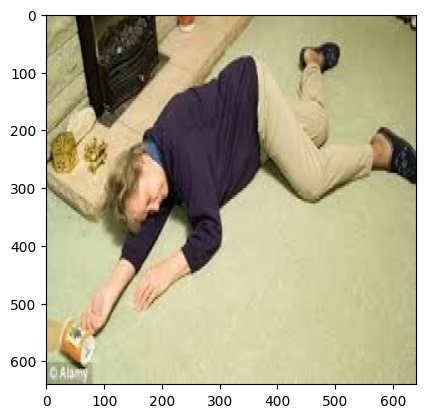

In [62]:
import cv2
from matplotlib import pyplot as plt

image_path = 'my_dataset_folder/test/images/fall061_jpg.rf.588a5ca48100d65e0e6d8d9abe0fcfd6.jpg'

# Load the image with OpenCV
img = cv2.imread(image_path)

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()
